In [7]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

def color(col):
    if str(col) == '0':
        return 'red'
    elif str(col) == '1':
        return 'green'
    return 'blue'

def count(x, mu, sigma):
    return -1/2 * np.dot(np.dot(np.array(x - mu).reshape(1,2), np.linalg.inv(sigma)),
                         np.array(x - mu).reshape(2,1)) - 1/2 * np.log(np.linalg.det(sigma))

def predict(x):
    pred_arr = [count(x, mu[idx], sigma) for idx in range(len(mu))]
    
    return np.argmax(pred_arr)

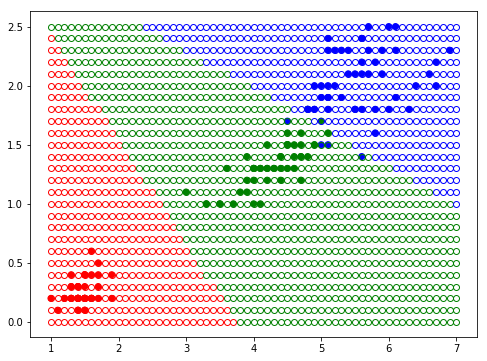

In [8]:
X = load_iris().data[:,2:]
y = load_iris().target

n = len(X[0])

X_distr = [[el for idx, el in enumerate(X) if y[idx] == cl] for cl in np.unique(y)]

mu = [1 / len(cl) * sum(cl) for cl in X_distr]
sigma = 1 / (len(X)) * sum([np.dot(np.array(x - mu[y[idx]]).reshape(n,1),
                                   np.array(x - mu[y[idx]]).reshape(1,n)) for idx, x in enumerate(X)])

plt.figure(1, figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=list(map(color, y)))

step = 0.1

for i in np.arange(1, 7.1, step=step):
    for j in np.arange(0, 2.6, step=step):
        col = str(predict([i,j]))

        plt.plot(i, j, c=color(col), marker='o', fillstyle='none')